In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [2]:
calories=pd.read_csv(r'C:\Users\berid\OneDrive\Desktop\mydata\MachineLearning\Calories\calories.csv')
exercise=pd.read_csv(r'C:\Users\berid\OneDrive\Desktop\mydata\MachineLearning\Calories\exercise.csv')

In [3]:
df=exercise.merge(calories,how='left',on='User_ID')

In [4]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [5]:
nan_colums=df.columns[df.isna().any()]
if len(nan_colums)>0:
    print(df.isna().sum())
else:
    print('No NaN values')

No NaN values


C:\Users\berid\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


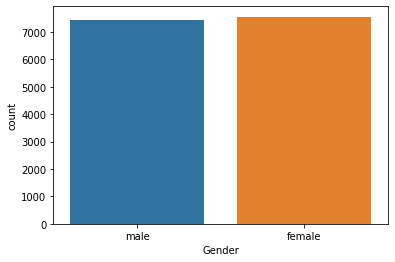

In [6]:
sns.countplot(df['Gender'])
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

object_columns=df.select_dtypes('object').columns
for object_column in object_columns:
    df[object_column]=le.fit_transform(df[object_column])

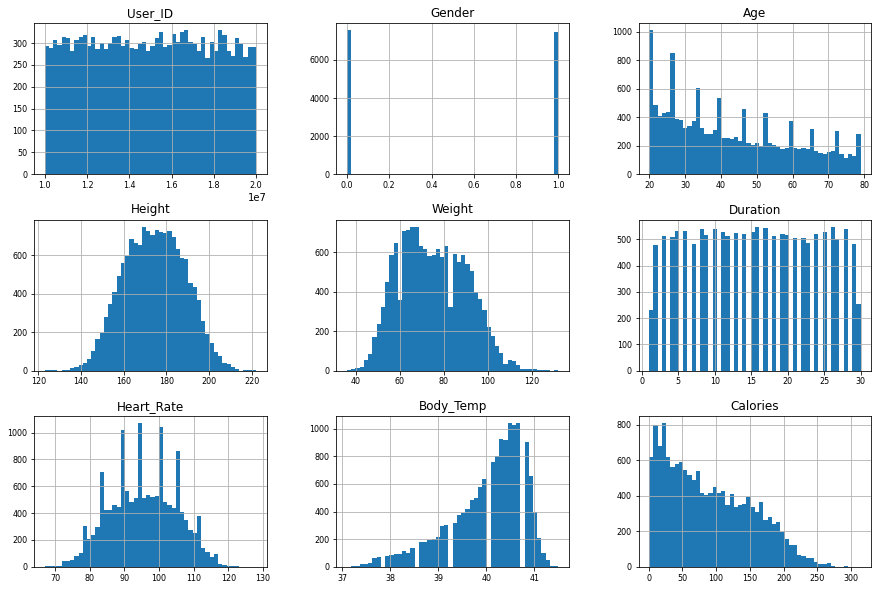

In [8]:
df.hist(bins=50,figsize=(15,10),xlabelsize=8,ylabelsize=8)
plt.show()

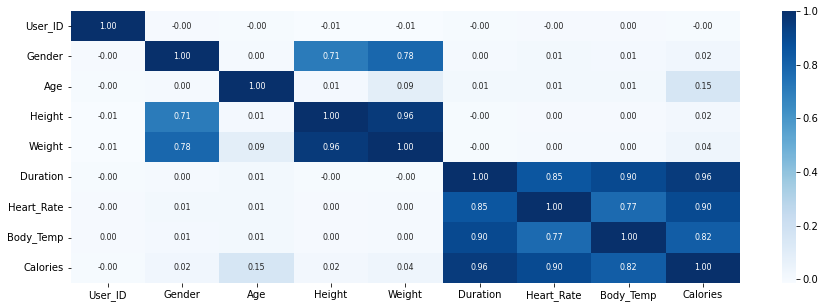

Calories      1.000000
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Gender        0.022357
Height        0.017537
User_ID      -0.001661
Name: Calories, dtype: float64


In [9]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.2f',annot_kws={'size':8})
plt.show()

print(df.corr()['Calories'].sort_values(ascending=False))

In [10]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
X=df.drop(columns=['User_ID','Calories'])
Y=df['Calories']

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=2)

### TRAINING MODELS  

In [13]:
model_xgbr=XGBRegressor()
model_lr=LinearRegression()
model_dtr=DecisionTreeRegressor()
model_svr=SVR()

models=[model_xgbr,model_lr,model_dtr,model_svr]

For XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) R2 square error for test data : 0.9988436889000072 and mean absolute error : 1.4807048829992613
For LinearRegression() R2 square error for test data : 0.9651499392811422 and mean absolute error : 8.385188053147184
For DecisionTreeRegressor() R2 square error for test data : 0.9929331102114585 and mean absol

[]

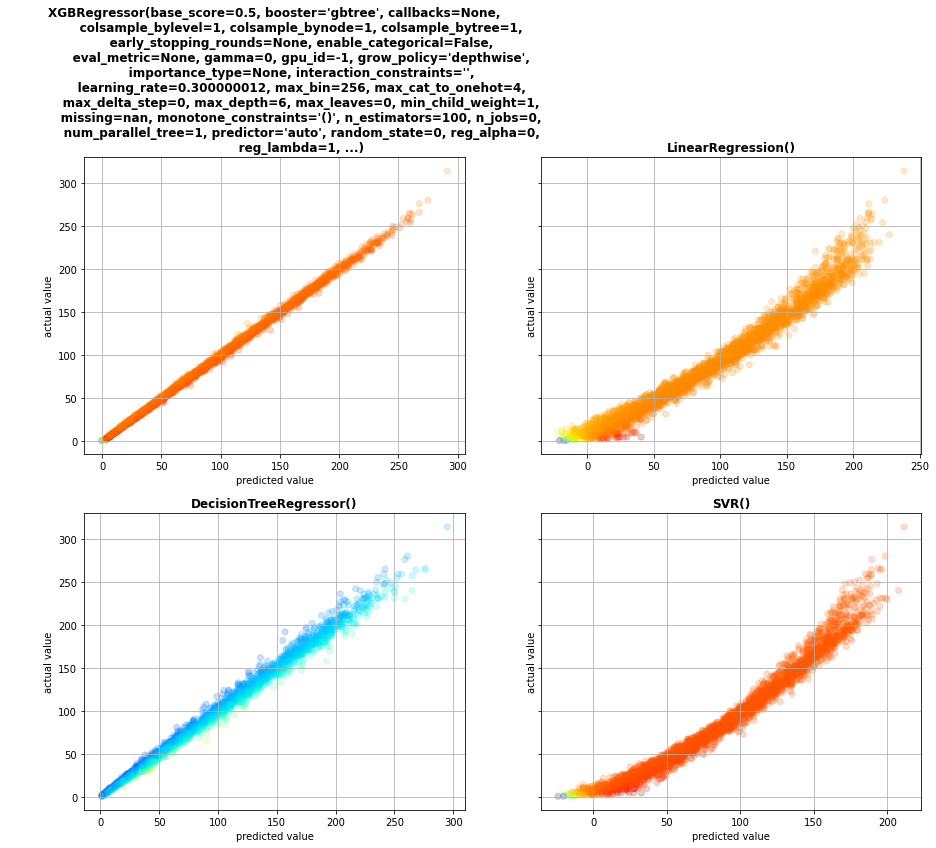

In [14]:
import math


fig,axes=plt.subplots(math.ceil(len(models)/2),2,figsize=(15,math.ceil(len(models))*3),sharey=True)

model_list=[]
r2_list=[]
mae_list=[]
rsme_list=[]

for ax,model in zip(axes.ravel(),models):
    model.fit(xtrain,ytrain)
    xtrain_prediction=model.predict(xtrain)
    xtest_prediction=model.predict(xtest)
    
    ax.scatter(xtest_prediction,ytest,c=xtest_prediction/ytest,cmap='jet',alpha=0.2)
    ax.set_xlabel('predicted value')
    ax.set_ylabel('actual value')
    ax.set_title(model,fontweight='bold')
    ax.grid()
    
    print(f'For {model} R2 square error for test data : {metrics.r2_score(xtest_prediction,ytest)} and mean absolute error : {metrics.mean_absolute_error(xtest_prediction,ytest)}')
    r2_list.append(metrics.r2_score(xtest_prediction,ytest))
    mae_list.append(metrics.mean_absolute_error(xtest_prediction,ytest))
    model_list.append(model)
    rsme_list.append(metrics.mean_squared_error(xtest_prediction,ytest,squared=False))
    
plt.plot()

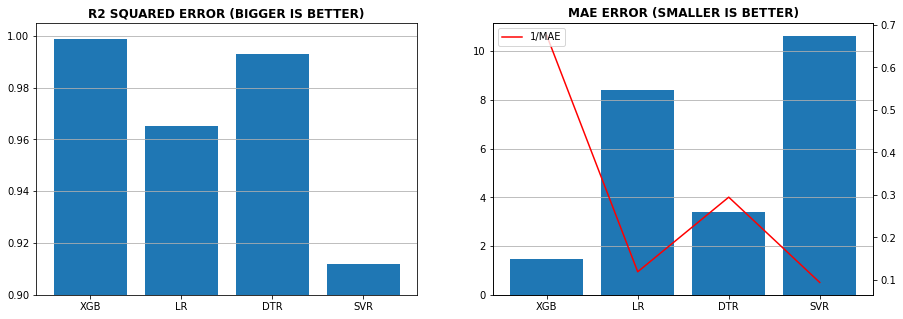

In [15]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

ax1.bar(['XGB','LR','DTR','SVR'],r2_list)
ax1.set_title('R2 SQUARED ERROR (BIGGER IS BETTER)',fontweight='bold')
ax1.set_ylim(0.9,1.005)
ax1.grid(axis='y')

ax2.bar(['XGB','LR','DTR','SVR'],mae_list)
ax2.set_title('MAE ERROR (SMALLER IS BETTER)',fontweight='bold')
ax3=ax2.twinx()
ax3.plot(['XGB','LR','DTR','SVR'],[1/i for i in mae_list],color='r',label='1/MAE')
ax2.grid(axis='y')
ax3.legend(loc='upper left')

plt.show()

In [16]:
# XGB Regressor performs best